### 0.Import Packages

In [45]:
# data processing
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


### 1.Loding Data

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 2.EDA

#### 2.1 Basic Information

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 2.2 Relative variables 

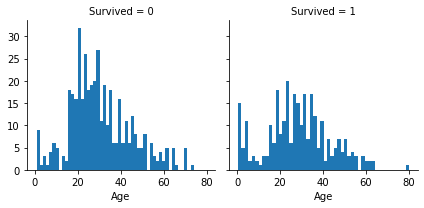

In [51]:
#2.2.1 Age
hist = sns.FacetGrid(train,col="Survived")
hist.map(plt.hist,"Age",bins=50)
# babies are more likely to survive.

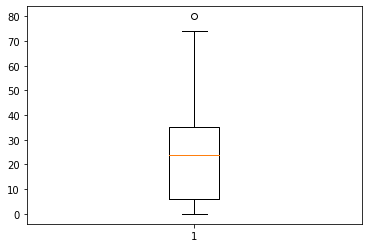

29.69911764705882

In [52]:
# Check the distribution of Age for further process.
plt.boxplot(train['Age'].fillna(0,inplace = False))
plt.show()
train['Age'].mean()
# almost 80% of all customers are under 40, and the mean value is 29.7


In [53]:
#2.2.2 Embarked
# Since we have only 2 null values in Embarked, we use the mode to fill in NAs
print(train['Embarked'].value_counts())
train['Embarked'].fillna('S',inplace=True)
# Use the mean value to fill in the only null fare value in test set

test['Fare'].fillna(test.Fare.mean(),inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [54]:
#2.2.3 Pclass
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# The Higher the class is, the more likely the passenger would survive

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [55]:
#2.2.4 Sex
train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# Female's survive rate is considerably higher than male's.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
# 2.2.5 Sibsp
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# Passengers with less than 2 siblings/spouses are more likely to survive

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [57]:
# 2.2.6 Parch
train[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending=False)
# Families with 1-3 members (parents/children) are more likey to survive.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


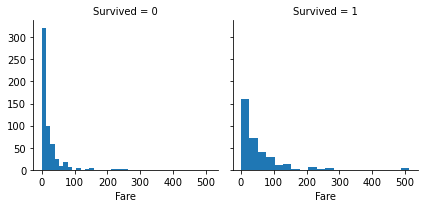

In [58]:
# 2.2.7 Fare
hist2 = sns.FacetGrid(train,col="Survived")
hist2.map(plt.hist,"Fare",bins=20)
# the lower the fare is, the less likely the passenger would survive

In [59]:
# 2.2.8 Passenger ID and Cabin
# Passenger ID are numbered sequentially and have no real meaning
train = train.drop('PassengerId', axis=1)
# Cabin has too many null values
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)
# Ticket is useless
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

### 3 Feature Engineering

#### 3.1 Name and title

In [60]:
# Names contain titles, which represent passenger's social status and thus might affect their survival status.
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex']).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


In [61]:
# Combine titles of nobility
train["Title"] = train["Title"].replace(['Lady', 'Countess', 'Dona'],"Female Nobility")
train["Title"] = train["Title"].replace(['Capt', 'Col','Don','Dr','Major','Rev','Sir','Jonkheer',],"Male Nobility")
train["Title"] = train["Title"].replace('Mlle', 'Miss') 
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Miss')

test["Title"] = test["Title"].replace(['Lady', 'Countess', 'Dona'],"Female Nobility")
test["Title"] = test["Title"].replace(['Capt', 'Col','Don','Dr','Major','Rev','Sir','Jonkheer',],"Male Nobility")
test["Title"] = test["Title"].replace('Mlle', 'Miss') 
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Miss')

In [62]:
train[["Title","Survived"]].groupby(["Title"],as_index=False).mean()
# Female's survival rate is higher.

,Title,Survived
0,Female Nobility,1.000000
1,Male Nobility,0.285714
2,Master,0.575000
3,Miss,0.704301
4,Mr,0.156673
5,Mrs,0.792000


In [63]:
train = train.drop(["Name"],axis=1)
test = test.drop(["Name"],axis=1)

#### 3.2 Age

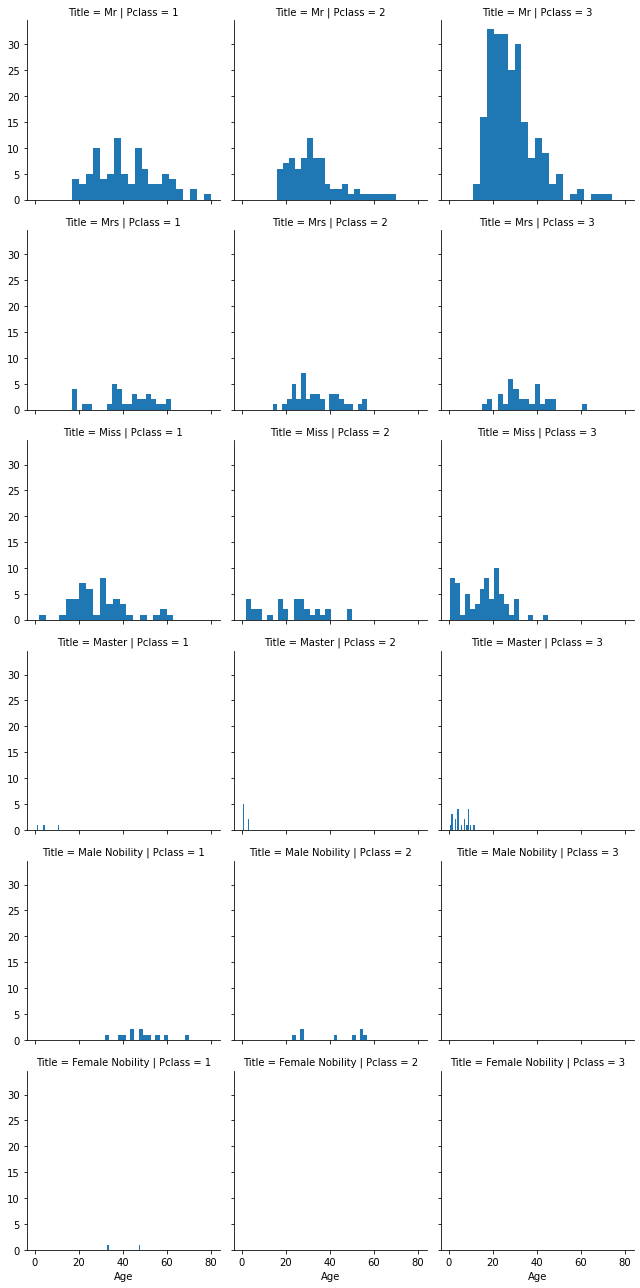

In [64]:
grid = sns.FacetGrid(train, col="Pclass",row="Title")
grid.map(plt.hist,"Age",bins=20)

In [65]:
# filling out null values by mean
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

#### 3.3 Identify babies

In [66]:
train.loc[train["Age"] > 2,"IsBaby"] = 0
train.loc[train["Age"] <= 2,"IsBaby"] = 1

test.loc[test["Age"] > 2,"IsBaby"] = 0
test.loc[test["Age"] <= 2,"IsBaby"] = 1

#### 3.4 Family members

In [67]:
# Combine Parch and sibsp as family members, and remove these two
train["Familymembers"] = train["Parch"] + train["SibSp"] + 1
test["Familymembers"] = test["Parch"] + test["SibSp"] + 1
train[["Familymembers","Survived"]].groupby(["Familymembers"],as_index = False).mean().sort_values(by="Familymembers",ascending=True)

train = train.drop(["Parch","SibSp"],axis=1)
test = test.drop(["Parch","SibSp"],axis=1)

#### 3.5 Converting categorical feature

In [68]:
#sex
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#title
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Male Nobility": 5, "Female Nobility":6}
train['Title'] = train['Title'].map(mapping)
train['Title'] = train['Title'].fillna(0)
test['Title'] = test['Title'].map(mapping)
test['Title'] = test['Title'].fillna(0)

# Embarked
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


### 4 Model Building


In [69]:
X = train.drop("Survived",axis=1)
Y = train["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=999)

In [70]:
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(X_train,Y_train)
parameters = {'n_estimators': [5, 10, 20, 50], 
              #'max_features': ['auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              #'min_samples_split': [],
              #'min_samples_leaf': []
             }
acc_scorer = make_scorer(accuracy_score)
grid = GridSearchCV(rfc, parameters, scoring=acc_scorer)
grid = grid.fit(X_train, Y_train)
rfc_best = grid.best_estimator_
rfc_best.fit(X_train, Y_train)
pred = rfc_best.predict(X_test)
acc_rf=accuracy_score(Y_test, pred)
acc_rf

0.8100558659217877

In [71]:
final_result = rfc_best.predict(test.drop("PassengerId",axis=1))

In [72]:
final_file = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": final_result
    })

final_file.to_csv('result_random_forest_'
                  +".csv", 
                  index=False)

In [ ]:
# about top 18%